In [3]:
%matplotlib inline
from ahkab import new_pz, run
from ahkab.circuit import Circuit
from ahkab.plotting import plot_results # calls matplotlib for you
import numpy as np
import matplotlib.pyplot as plt

from zplane import zplane

## Butterworth Filter 

![Butterworth Filter](./pictures/butterworth_1k.svg)


In [4]:
# Define the circuit
cir = Circuit('Butterworth 1kHz band-pass filter')
cir.add_vsource('V1', 'n1', cir.gnd, dc_value=0., ac_value=1.)
cir.add_resistor('R1', 'n1', 'n2', 50.)
cir.add_inductor('L1', 'n2', 'n3', 0.245894)
cir.add_capacitor('C1', 'n3', 'n4', 1.03013e-07)
cir.add_inductor('L2', 'n4', cir.gnd, 9.83652e-05)
cir.add_capacitor('C2', 'n4', cir.gnd, 0.000257513)
cir.add_inductor('L3', 'n4', 'n5', 0.795775)
cir.add_capacitor('C3', 'n5', 'n6', 3.1831e-08)
cir.add_inductor('L4', 'n6', cir.gnd, 9.83652e-05)
cir.add_capacitor('C4', 'n6', cir.gnd, 0.000257513)
cir.add_capacitor('C5', 'n7', 'n8', 1.03013e-07)
cir.add_inductor('L5', 'n6', 'n7', 0.245894)
cir.add_resistor('R2', 'n8', cir.gnd, 50.)



## Run pole-zero analysis

In [5]:
pz = new_pz(input_source='V1', output_port=('n8', cir.gnd), x0=None, shift=1e3)
r = run(cir, pz)['pz']
for x, _ in r:
  print( "* %s = %+g %+gj Hz (%+g < %+g)" % (x, np.real(r[x]), np.imag(r[x]), np.abs(r[x]), np.angle(r[x])))


* p0 = -10.0006 -999.95j Hz (+1000 < -1.5808)
* p1 = -10.0006 +999.95j Hz (+1000 < +1.5808)
* p2 = -8.13872 -1005.86j Hz (+1005.9 < -1.57889)
* p3 = -8.13872 +1005.86j Hz (+1005.9 < +1.57889)
* p4 = -8.04254 -994.107j Hz (+994.139 < -1.57889)
* p5 = -8.04254 +994.107j Hz (+994.139 < +1.57889)
* p6 = -3.11991 -1009.55j Hz (+1009.56 < -1.57389)
* p7 = -3.11991 +1009.55j Hz (+1009.56 < +1.57389)
* p8 = -3.06077 -990.529j Hz (+990.534 < -1.57389)
* p9 = -3.06077 +990.529j Hz (+990.534 < +1.57389)
* z0 = -7.73422e+06 -5.61862e+06j Hz (+9.55965e+06 < -2.51333)
* z1 = -7.73422e+06 +5.61862e+06j Hz (+9.55965e+06 < +2.51333)
* z2 = -0.107103 +0j Hz (+0.107103 < +3.14159)
* z3 = -0.0330736 -0.101853j Hz (+0.107088 < -1.88477)
* z4 = -0.0330736 +0.101853j Hz (+0.107088 < +1.88477)
* z5 = +0.0866249 -0.0629217j Hz (+0.107065 < -0.628205)
* z6 = +0.0866249 +0.0629217j Hz (+0.107065 < +0.628205)
* z7 = +2.95303e+06 -9.09111e+06j Hz (+9.5587e+06 < -1.25672)
* z8 = +2.95303e+06 +9.09111e+06j Hz (+9.55

# Create zero-pole plot

defaultdict(<class 'int'>, {(452, 1063): 10})


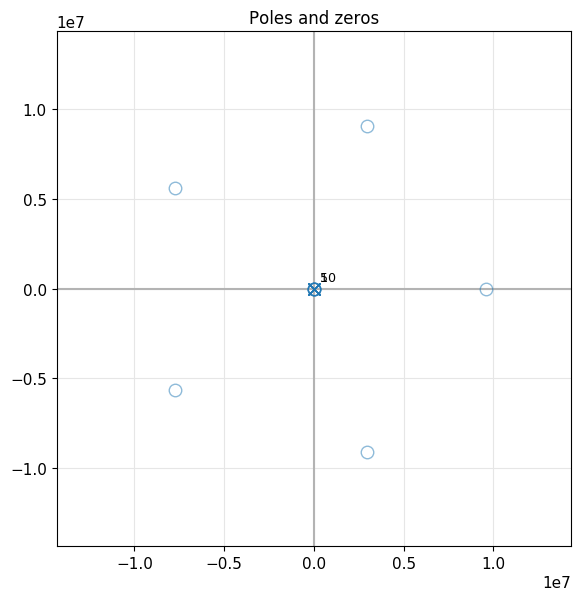

In [6]:
plt.figure(figsize=[15,15],dpi=100)
plt.subplot(2, 2, 1)
plt.title('Poles and zeros')
plt.grid(True, color='0.9', linestyle='-', which='both', axis='both')
zplane(r.zeros, r.poles)
#zplane(z, p)

## Pole-Zero theory

[pole-zero wikipedia](https://en.wikipedia.org/wiki/Pole%E2%80%93zero_plot)

![Pole-zero](http://www.sciweavers.org/tex2img.php?eq=H%28s%29%20%3D%20%20k_%7B0%7D%20%5Cfrac%7B%28s-z_%7B0%7D%29%28s-z_%7B1%7D%29%28s-z_%7B2%7D%29%7D%7B%28s-p_%7B0%7D%29%28s-p_%7B1%7D%29%28s-p_%7B2%7D%29%7D%20&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0)

![s](http://www.sciweavers.org/tex2img.php?eq=s%20%3D%20j%2A%20%5Comega%20&bc=White&fc=Black&im=jpg&fs=12&ff=arev&edit=0)



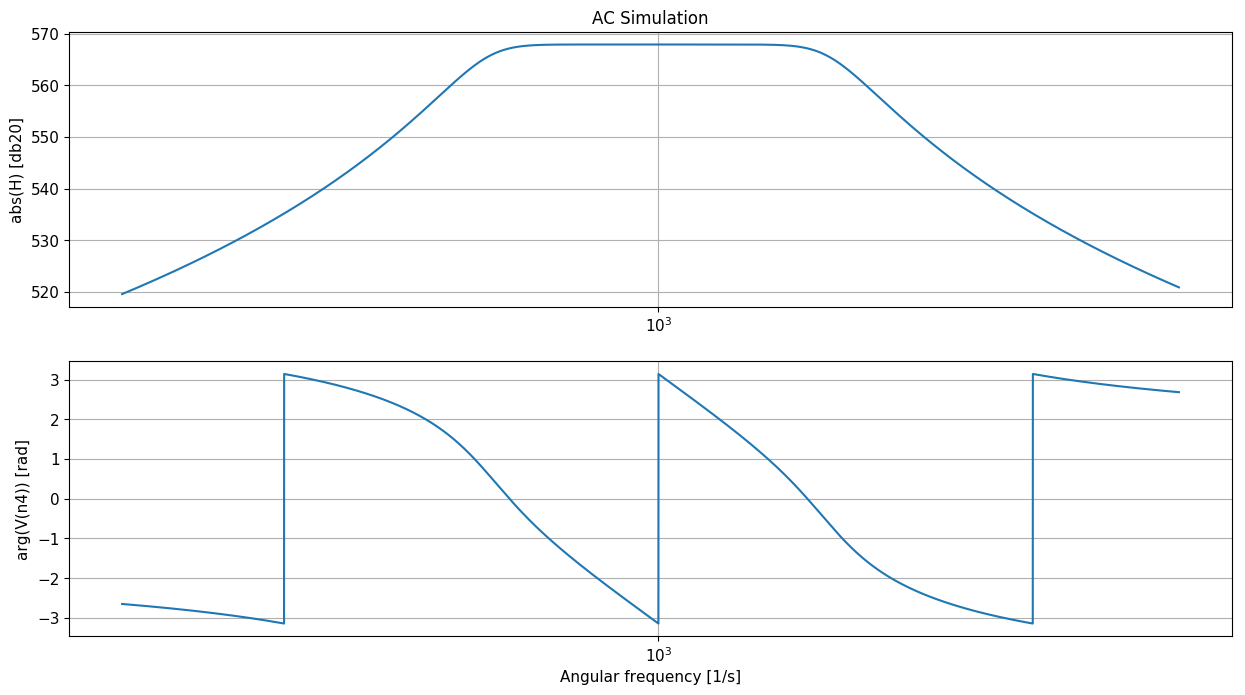

In [9]:
z=r.zeros
p=r.poles

w_min=0.97e3
w_max=1.03e3
w_points=int(1e4)

# Generate a log frequency range
w= w_min*10**((np.log10(w_max) - np.log10(w_min))*np.arange(w_points)/(w_points - 1))
j=1j
s=j*w

if(p.size):
    HN=(np.reshape(s, (-1,1)).repeat(p.size,axis=1)-p).prod(axis=1)
else:
    HN=np.ones(w_points)
if(z.size):
    HZ=(np.reshape(s, (-1,1)).repeat(z.size,axis=1)-z).prod(axis=1)
else:
    HZ=np.ones(w_points)
    
# K = np.abs(p).prod()/np.abs(z).prod()
# K = np.abs(p).sum()/np.abs(z).sum()
# print(K,HZ,HN)
K=1
H=HZ/HN


plt.figure(figsize=[15,8],dpi=100)
plt.subplot(211)
plt.grid(True)
plt.semilogx(w, np.log10(np.abs(K*H))*20, '-')
plt.ylabel('abs(H) [db20]')
plt.title("AC Simulation")
plt.subplot(212)
plt.grid(True)
plt.semilogx(w, np.angle((H)), '-')
plt.xlabel('Angular frequency [1/s]')
plt.ylabel('arg(V(n4)) [rad]')